In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [3]:
batch_size = 64

trainset = datasets.MNIST(root='./data2', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data2', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100.0%


Extracting ./data2/MNIST/raw/train-images-idx3-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100.0%


Extracting ./data2/MNIST/raw/train-labels-idx1-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100.0%


Extracting ./data2/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100.0%

Extracting ./data2/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data2/MNIST/raw



In [5]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [6]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [7]:
class LinearRegression(nn.Module):
    def __init__(self, x_dim,hidden_dim, y_dim):
        super(LinearRegression,self).__init__()
        self.hidden = nn.Linear(x_dim,hidden_dim)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(hidden_dim,y_dim)
    
    def forward(self,X):
        X = self.hidden(X)
        X = self.relu(X)
        X = self.linear(X)
        return X

In [8]:
x_dim = trainset[0][0].shape[0]
y_dim = 1
hidden_dim = 128
model = LinearRegression(x_dim,hidden_dim,y_dim)
criterion = nn.MSELoss()
epochs = 100
lr = 0.01
optimizer = SGD(model.parameters(),lr=lr)
losses = []

In [9]:
for epoch in range(epochs):
    epoch_loss = 0
    for xi,yi in trainloader:
        
        yi = yi.float().view(-1,1)
        output = model(xi)
        loss = criterion(output,yi)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/100, Loss: 2.780419108011067
Epoch 2/100, Loss: 1.439612839077073
Epoch 3/100, Loss: 1.1695060079921282
Epoch 4/100, Loss: 1.0180949777174098
Epoch 5/100, Loss: 0.919652166968978
Epoch 6/100, Loss: 0.8428794519225163
Epoch 7/100, Loss: 0.7903241308004871
Epoch 8/100, Loss: 0.7438493201028563
Epoch 9/100, Loss: 0.7111048470618628
Epoch 10/100, Loss: 0.6851116846174573
Epoch 11/100, Loss: 0.6525459650006376
Epoch 12/100, Loss: 0.629352703404579
Epoch 13/100, Loss: 0.6052565818656482
Epoch 14/100, Loss: 0.5901448066904347
Epoch 15/100, Loss: 0.5812639442842398
Epoch 16/100, Loss: 0.5596671472353213
Epoch 17/100, Loss: 0.5482426933419984
Epoch 18/100, Loss: 0.5270127168914148
Epoch 19/100, Loss: 0.5166217012922647
Epoch 20/100, Loss: 0.5040026735712979
Epoch 21/100, Loss: 0.5023044897263238
Epoch 22/100, Loss: 0.49149614537575603
Epoch 23/100, Loss: 0.48222882163994857
Epoch 24/100, Loss: 0.47430620277360047
Epoch 25/100, Loss: 0.46391387893828245
Epoch 26/100, Loss: 0.455879315606

Text(0, 0.5, 'Loss')

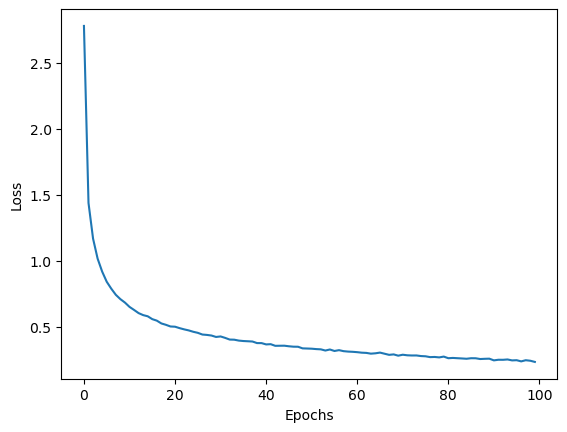

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses,label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [11]:
PATH = './mnist-relu-linear-hidden.pth'
torch.save(model.state_dict(), PATH)

In [12]:
from sklearn.metrics import r2_score

model.eval()
test_loss = 0
all_outputs = []
all_targets = []
with torch.no_grad(): 
    for xi, yi in testloader:
        yi = yi.float().view(-1, 1)
        output = model(xi)
        loss = criterion(output, yi)
        test_loss += loss.item()

        all_outputs.append(output)
        all_targets.append(yi)

all_outputs = torch.cat(all_outputs).numpy()
all_targets = torch.cat(all_targets).numpy()

avg_test_loss = test_loss / len(testloader)
print(f'Test Loss: {avg_test_loss}')
print(f'R2 Score: {r2_score(all_targets,all_outputs)}')


Test Loss: 0.6371985533434874
R2 Score: 0.9238705039024353
